In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import seaborn as sns

In [2]:
X = np.load("X.npy")
t = np.load("y.npy")

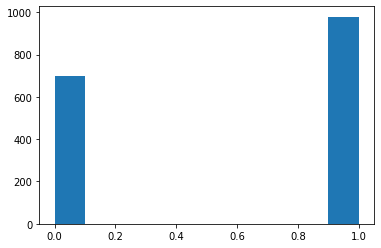

In [3]:
plt.hist(t)
plt.show()

Fold 1 of 5:
Train on 1341 samples, validate on 336 samples
Epoch 1/100
1341/1341 [==============================] - 5s 4ms/sample - loss: 0.2240 - acc: 0.6600 - mse: 0.2240 - val_loss: 0.1945 - val_acc: 0.7202 - val_mse: 0.1945
Epoch 2/100
1341/1341 [==============================] - 5s 4ms/sample - loss: 0.1962 - acc: 0.7047 - mse: 0.1962 - val_loss: 0.1978 - val_acc: 0.7173 - val_mse: 0.1978
Epoch 3/100
1341/1341 [==============================] - 5s 4ms/sample - loss: 0.1743 - acc: 0.7569 - mse: 0.1743 - val_loss: 0.2223 - val_acc: 0.6786 - val_mse: 0.2223
Epoch 4/100
1341/1341 [==============================] - 5s 4ms/sample - loss: 0.1616 - acc: 0.7778 - mse: 0.1616 - val_loss: 0.2362 - val_acc: 0.7024 - val_mse: 0.2362
Epoch 5/100
1341/1341 [==============================] - 5s 4ms/sample - loss: 0.1532 - acc: 0.8061 - mse: 0.1532 - val_loss: 0.1778 - val_acc: 0.7470 - val_mse: 0.1778
Epoch 6/100
1341/1341 [==============================] - 5s 3ms/sample - loss: 0.1481 - acc: 0.

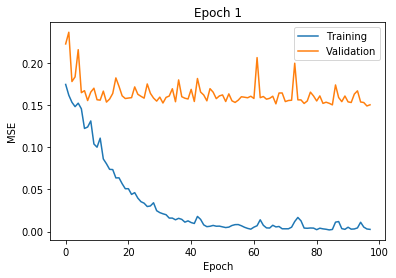

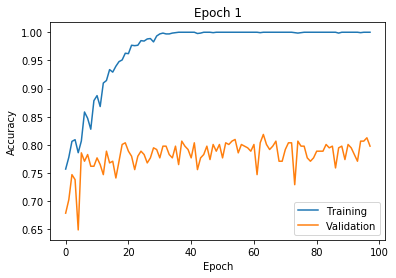

Fold 2 of 5:
Train on 1341 samples, validate on 336 samples
Epoch 1/100
1341/1341 [==============================] - 226s 168ms/sample - loss: 0.2389 - acc: 0.6085 - mse: 0.2389 - val_loss: 0.2260 - val_acc: 0.6071 - val_mse: 0.2260
Epoch 2/100
1341/1341 [==============================] - 7s 5ms/sample - loss: 0.1954 - acc: 0.7159 - mse: 0.1954 - val_loss: 0.2168 - val_acc: 0.6310 - val_mse: 0.2168
Epoch 3/100
1341/1341 [==============================] - 7s 5ms/sample - loss: 0.1805 - acc: 0.7450 - mse: 0.1805 - val_loss: 0.1971 - val_acc: 0.6845 - val_mse: 0.1971
Epoch 4/100
1341/1341 [==============================] - 5s 4ms/sample - loss: 0.1690 - acc: 0.7457 - mse: 0.1690 - val_loss: 0.1770 - val_acc: 0.7321 - val_mse: 0.1770
Epoch 5/100
1341/1341 [==============================] - 4s 3ms/sample - loss: 0.1521 - acc: 0.7927 - mse: 0.1521 - val_loss: 0.1882 - val_acc: 0.7500 - val_mse: 0.1882
Epoch 6/100
1341/1341 [==============================] - 4s 3ms/sample - loss: 0.1520 - acc

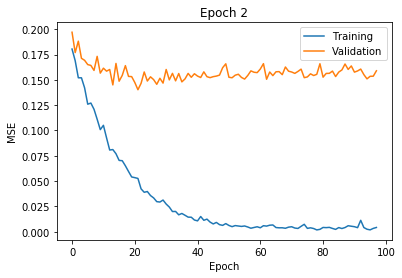

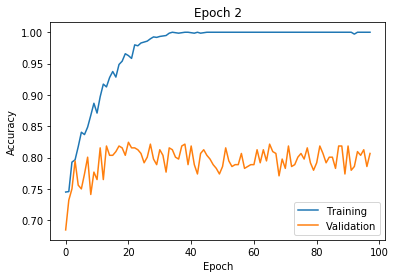

Fold 3 of 5:
Train on 1341 samples, validate on 336 samples
Epoch 1/100
1341/1341 [==============================] - 11s 8ms/sample - loss: 0.2366 - acc: 0.6339 - mse: 0.2366 - val_loss: 0.2119 - val_acc: 0.6756 - val_mse: 0.2119
Epoch 2/100
1341/1341 [==============================] - 11s 8ms/sample - loss: 0.1997 - acc: 0.7047 - mse: 0.1997 - val_loss: 0.2015 - val_acc: 0.7232 - val_mse: 0.2015
Epoch 3/100
1341/1341 [==============================] - 7s 5ms/sample - loss: 0.1754 - acc: 0.7509 - mse: 0.1754 - val_loss: 0.2286 - val_acc: 0.6994 - val_mse: 0.2286
Epoch 4/100
1341/1341 [==============================] - 7s 5ms/sample - loss: 0.1768 - acc: 0.7412 - mse: 0.1768 - val_loss: 0.2160 - val_acc: 0.7292 - val_mse: 0.2160
Epoch 5/100
1341/1341 [==============================] - 7s 5ms/sample - loss: 0.1653 - acc: 0.7726 - mse: 0.1653 - val_loss: 0.1902 - val_acc: 0.7440 - val_mse: 0.1902
Epoch 6/100
1341/1341 [==============================] - 7s 5ms/sample - loss: 0.1524 - acc: 

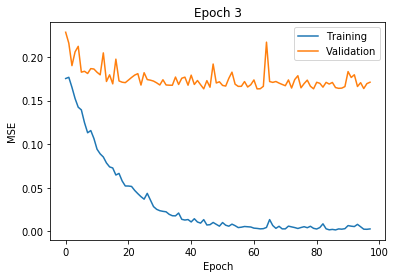

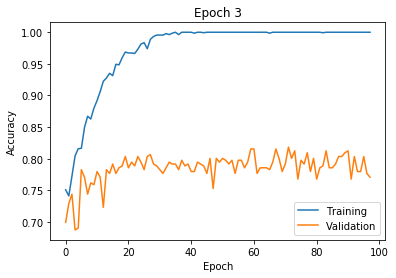

Fold 4 of 5:
Train on 1342 samples, validate on 335 samples
Epoch 1/100
1342/1342 [==============================] - 8s 6ms/sample - loss: 0.2466 - acc: 0.6200 - mse: 0.2466 - val_loss: 0.1986 - val_acc: 0.6925 - val_mse: 0.1986
Epoch 2/100
1342/1342 [==============================] - 7s 5ms/sample - loss: 0.1974 - acc: 0.7146 - mse: 0.1974 - val_loss: 0.1722 - val_acc: 0.7612 - val_mse: 0.1722
Epoch 3/100
1342/1342 [==============================] - 7s 5ms/sample - loss: 0.1790 - acc: 0.7489 - mse: 0.1790 - val_loss: 0.1884 - val_acc: 0.7015 - val_mse: 0.1884
Epoch 4/100
1342/1342 [==============================] - 6s 5ms/sample - loss: 0.1716 - acc: 0.7586 - mse: 0.1716 - val_loss: 0.1941 - val_acc: 0.7552 - val_mse: 0.1941
Epoch 5/100
1342/1342 [==============================] - 7s 5ms/sample - loss: 0.1523 - acc: 0.7794 - mse: 0.1523 - val_loss: 0.1576 - val_acc: 0.7672 - val_mse: 0.1576
Epoch 6/100
1342/1342 [==============================] - 7s 6ms/sample - loss: 0.1413 - acc: 0.

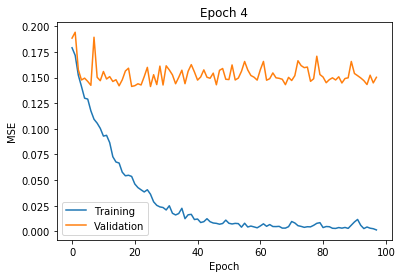

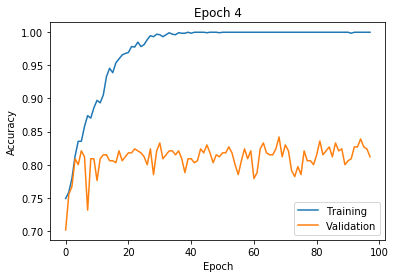

Fold 5 of 5:
Train on 1343 samples, validate on 334 samples
Epoch 1/100
1343/1343 [==============================] - 12s 9ms/sample - loss: 0.2259 - acc: 0.6500 - mse: 0.2259 - val_loss: 0.1838 - val_acc: 0.7305 - val_mse: 0.1838
Epoch 2/100
1343/1343 [==============================] - 7s 5ms/sample - loss: 0.1943 - acc: 0.7036 - mse: 0.1943 - val_loss: 0.1724 - val_acc: 0.7455 - val_mse: 0.1724
Epoch 3/100
1343/1343 [==============================] - 7s 5ms/sample - loss: 0.1769 - acc: 0.7491 - mse: 0.1769 - val_loss: 0.1780 - val_acc: 0.7545 - val_mse: 0.1780
Epoch 4/100
1343/1343 [==============================] - 7s 5ms/sample - loss: 0.1599 - acc: 0.7848 - mse: 0.1599 - val_loss: 0.1691 - val_acc: 0.7455 - val_mse: 0.1691
Epoch 5/100
1343/1343 [==============================] - 7s 5ms/sample - loss: 0.1514 - acc: 0.7841 - mse: 0.1514 - val_loss: 0.1554 - val_acc: 0.7874 - val_mse: 0.1554
Epoch 6/100
1343/1343 [==============================] - 7s 5ms/sample - loss: 0.1392 - acc: 0

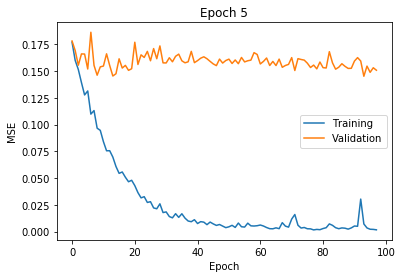

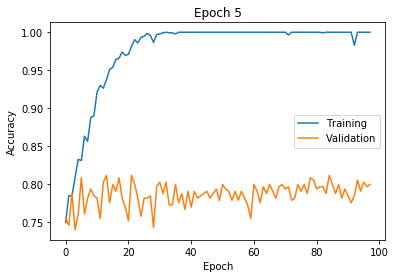

In [9]:
tf.keras.backend.set_floatx('float64')
number_of_folds = 5
kf = sklearn.model_selection.StratifiedKFold(number_of_folds, shuffle=True, random_state=1)
for i, (train_index, test_index) in enumerate(kf.split(X, t)):
    print(f"Fold {i+1} of {number_of_folds}:")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
        loss="mse",
        metrics=['acc', 'mse'],
    )
    history = model.fit(
        X[train_index], 
        t[train_index], 
        epochs=100,
        batch_size=10,
        validation_data=(
            X[test_index], 
            t[test_index]
        )
    )
    plt.figure()
    plt.plot(history.history['mse'][2:], label="Training")
    plt.plot(history.history['val_mse'][2:], label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title(f"Epoch {i + 1}")
    plt.legend()
    plt.show()
    plt.figure()
    plt.plot(history.history['acc'][2:], label="Training")
    plt.plot(history.history['val_acc'][2:], label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"Epoch {i + 1}")
    plt.legend()
    plt.show()